In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, precision_recall_curve

# Carga de resultados

In [42]:
df_preds = pd.read_csv('../results/preds.csv')

In [43]:
df_preds.head()

,y_actual,y_pred_test_lr,y_pred_proba_test_lr,y_pred_test_mnb,y_pred_proba_test_mnb
0,0,0,0.467972,0,0.424974
1,1,1,0.680920,1,0.528030
2,1,1,0.976586,1,0.924118
3,0,0,0.217602,0,0.337869
4,0,0,0.458423,0,0.449987


# Métricas

## Accuracy

In [31]:
accuracy_score(df_preds['y_actual'], df_preds['y_pred_lr'])

0.7934347477982386

## Matriz de confusión

In [32]:
conf_matrix = confusion_matrix(df_preds['y_actual'], df_preds['y_pred_lr'])
conf_matrix

array([[1463,  410],
       [ 364, 1510]])

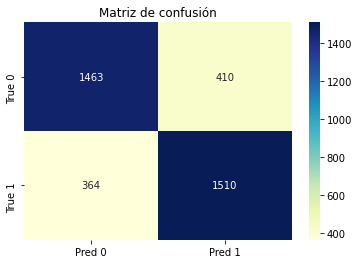

In [33]:
ax = sns.heatmap(
    conf_matrix,
    cmap="YlGnBu", 
    annot=True, 
    fmt=".0f", 
    xticklabels=['Pred 0','Pred 1'],
    yticklabels=['True 0','True 1']
).set_title('Matriz de confusión')

## Classification report

In [35]:
print(classification_report(df_preds['y_actual'], df_preds['y_pred_lr']))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1873
           1       0.79      0.81      0.80      1874

    accuracy                           0.79      3747
   macro avg       0.79      0.79      0.79      3747
weighted avg       0.79      0.79      0.79      3747



## Precision y Recall para diferentes valores de cut-off

In [64]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.axvline(0.5, color='orange', ls='--')
    plt.legend(loc='best')

In [65]:
p, r, thresholds = precision_recall_curve(df_preds['y_actual'], df_preds['y_pred_proba_test_lr'])

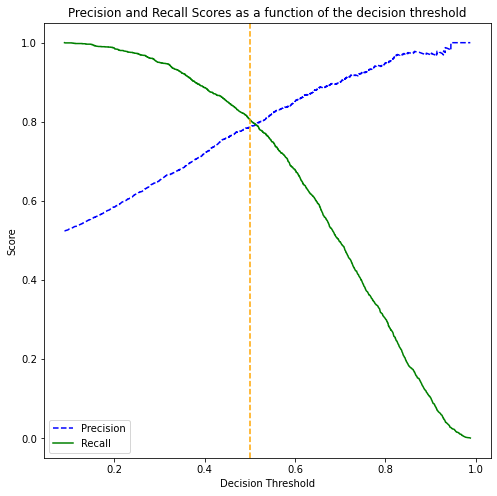

In [66]:
plot_precision_recall_vs_threshold(p, r, thresholds)

# Conclusiones

- La tasa de falsos positivos y de falsos negativos es muy similar. Para un caso como el de análisis de sentimiento, donde el foco suele ser la detección de reviews negativas, sería interesante ajustar el enfoque para reducir la tasa de falsos negativos.
- El modelo, en términos de precision y recall, funciona de manera similar para ambas clases (reviews negativas y positivas). Esto nos permite afirmar que el modelo parece generalizar bien para ambas clases lo que es una muy buena noticia.
- El umbral de decisión por defecto es 0.5. Modificar este valor nos permite ajustar nuestras predicciones mejorando las predicciones tomando como referencia el recall, pero perdiendo, por contra, precision (y viceversa). Observando la gráfica donde se representa la evolución del recall / precision en función del cut-off escogido podemos ver como valores mayores que 0.5 hacen que el recall se degrade en exceso. Valores menores de 0.5, pese a permitirnos obtener un recall mayor, hacen que la precision sea mucho menor en comparación. Por tanto, valores cercanos a 0.5 (idealmente algo por encima) serán los que mejores resultados nos permitan obtener.
- Posibles futuros pasos:
    - Validar resultados con un conjunto mayor de test
    - Repetir el ejercicio con conjuntos de train / test mayores
    - Evaluar los resultados al modificar los porcentajes de reviews empleadas para train / test con el objetivo de encontrar un valor pseudo-óptimo
    - Probar otras familias de modelos (árboles, boosting, redes neuronales...)